In [1]:
"""
Update Parameters Here
"""
COLLECTION = "DogeX"
grifter_address = "0x2913e0b55f2f2ca7331611d2b45c8b0feecf082a"

In [2]:
"""
@author: mdigi14
"""

import pandas as pd
from matplotlib import pyplot as plt

from utils import config

"""
Plot params
"""
plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

Grifter sample size:  66
Non grifter sample size:  77


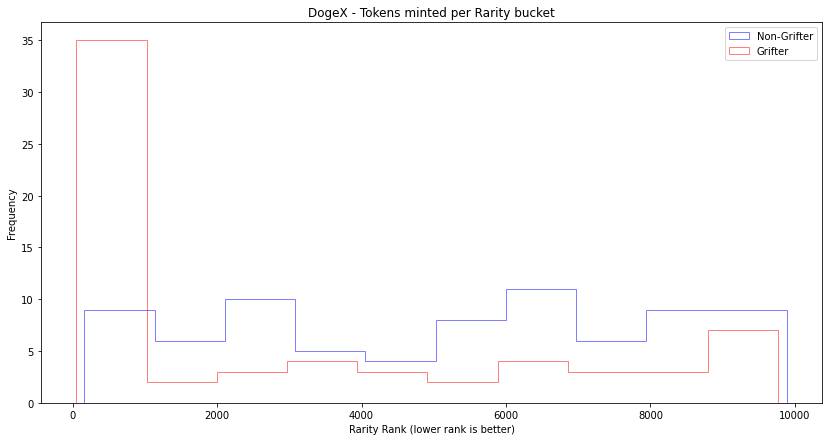

In [3]:
"""
Generate Plot
"""

PATH = f"{config.MINTING_FOLDER}/{COLLECTION}_minting.csv"

minting = pd.read_csv(PATH)
grifter_minting = minting[minting["to_account"] == grifter_address]
grifter_mint_count = len(grifter_minting)

minted_as_much = minting.groupby("to_account").filter(
    lambda x: x["to_account"].count() >= grifter_mint_count
)  # try to find non-grifter with similiar mint count (greater or equal)
minted_as_much = minted_as_much[
    minted_as_much["to_account"] != grifter_address
]  # exclude grifter

closest_list = minted_as_much["to_account"].value_counts(ascending=True).index.tolist()
non_grifter_address = closest_list[
    6
]  # arbitrarily picked 7th closest mint count bc it is the first with uniform-ish distribution
non_grifter_minting = minting[minting["to_account"] == non_grifter_address]

print("Grifter sample size: ", grifter_mint_count)
print("Non grifter sample size: ", len(non_grifter_minting))

plt.figure(figsize=(14, 7))
plt.hist(
    non_grifter_minting["rank"],
    bins=10,
    alpha=0.5,
    color="b",
    label="Non-Grifter",
    histtype="step",
)
plt.hist(
    grifter_minting["rank"],
    bins=10,
    alpha=0.5,
    color="r",
    label="Grifter",
    histtype="step",
)
plt.legend(loc="upper right")
plt.xlabel("Rarity Rank (lower rank is better)")
plt.ylabel("Frequency")
plt.title("{} - Tokens minted per Rarity bucket".format(COLLECTION))
plt.show()